In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import os
import copy
import seaborn as sns

In [4]:
hdata = pd.read_csv("Global_Superstore2.csv",encoding="latin-1") #to be used for Hierarchical
kdata = copy.deepcopy(hdata)    #to be used for KMeans

In [5]:
#selection of numerical features for clustering
selected_features = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]

#subsetting the raw data
hdata_sub = hdata[selected_features]

#for the purpose of the experiment, we're sampling the original dataset
hdata_sam = hdata_sub.sample(frac=0.05,random_state=42)

#using scaled dataset for further analysis
scaler = StandardScaler()
scaler.fit_transform(hdata_sam)   

array([[-0.52725334, -0.19530124,  1.22556712, -0.18422828, -0.46407044],
       [-0.51705195, -0.64888128,  0.27440218, -0.15144702, -0.45032207],
       [ 0.06975927, -0.64888128, -0.67676276,  0.67030004, -0.12299802],
       ...,
       [-0.35489064,  0.71185885,  1.22556712, -0.17571992, -0.33110681],
       [-0.34060869, -0.19530124, -0.67676276, -0.05230857, -0.35841521],
       [-0.4873727 , -0.64888128, -0.67676276, -0.10388047, -0.44373039]])

In [6]:
#---------------Hierarchical Clustering with n_clusters = 3-------------------------------------------
cluster_3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  

cl_3 = cluster_3.fit_predict(hdata_sam)

In [7]:
#the measure of the goodness of the clusters formed
score_3 = silhouette_score(hdata_sam,cl_3)
print(score_3)

0.7385651491792846


In [8]:
#---------------Hierarchical Clustering with n_clusters = 4-------------------------------------------
cluster_4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')  

cl_4 = cluster_4.fit_predict(hdata_sam)

In [9]:
#the measure of the goodness of the clusters formed
score_4 = silhouette_score(hdata_sam,cl_4)
print(score_4)

0.7378551366932286


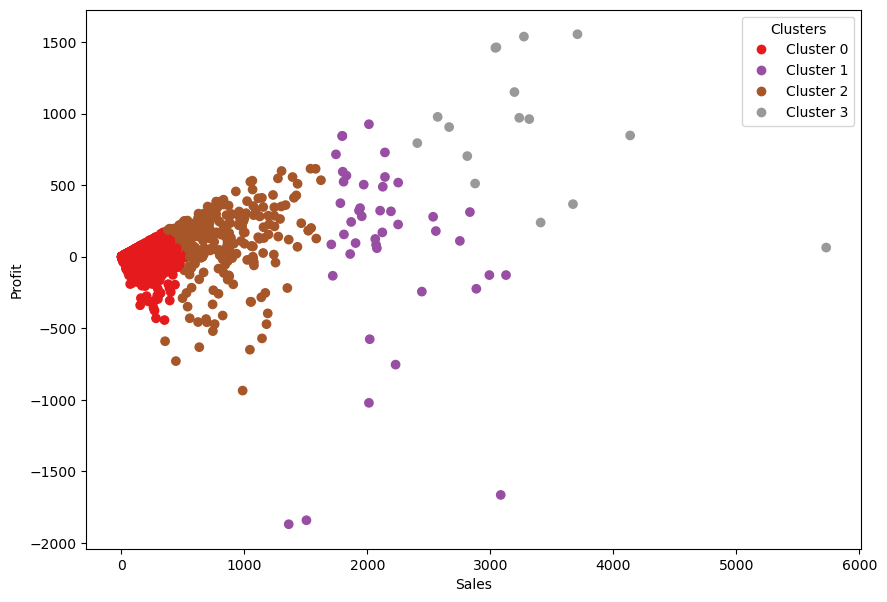

In [10]:
#------------visual plotting of the clusters formed
hdata_sam['Cluster'] = cl_4

plt.figure(figsize=(10, 7))   
scatter = plt.scatter(hdata_sam['Sales'], hdata_sam['Profit'], c=hdata_sam['Cluster'], cmap='Set1')

plt.xlabel("Sales")
plt.ylabel("Profit")

# Create a legend using legend_elements
legend_handles, _ = scatter.legend_elements()
legend_labels = [f'Cluster {cluster}' for cluster in sorted(hdata_sam['Cluster'].unique())]
plt.legend(legend_handles, legend_labels, title='Clusters')

plt.show()

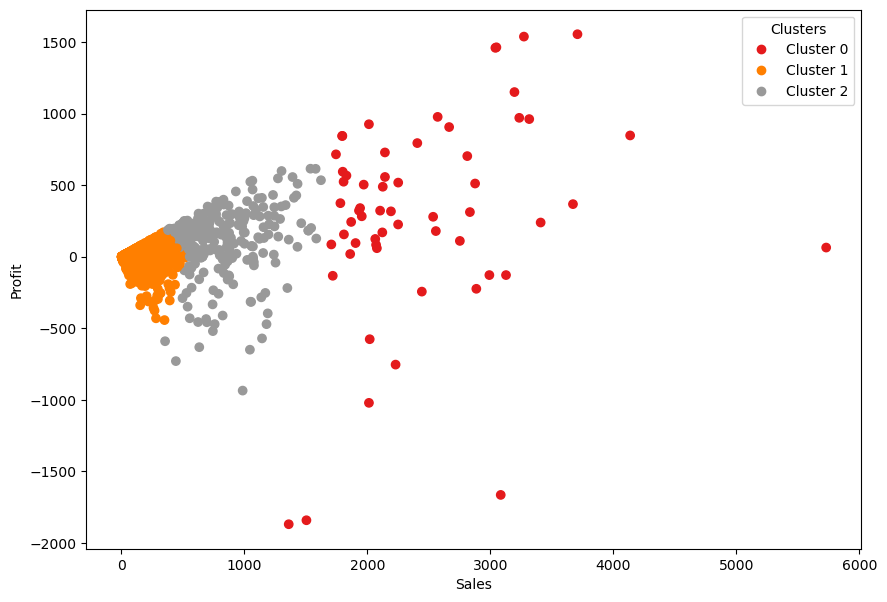

In [11]:
#here we'll plot Hierarchical with 3 clusters
hdata_sam2 = copy.deepcopy(hdata_sam)

hdata_sam2['Cluster'] = cl_3

plt.figure(figsize=(10, 7))   
scatter = plt.scatter(hdata_sam2['Sales'], hdata_sam2['Profit'], c=hdata_sam2['Cluster'], cmap='Set1')

plt.xlabel("Sales")
plt.ylabel("Profit")

# Create a legend using legend_elements
legend_handles, _ = scatter.legend_elements()
legend_labels = [f'Cluster {cluster}' for cluster in sorted(hdata_sam2['Cluster'].unique())]
plt.legend(legend_handles, legend_labels, title='Clusters')

plt.show()

In [12]:
#------------------now KMeans clustering with 4 clusters---------------------------------
kdata_sub = kdata[selected_features]

kdata_sam = kdata_sub.sample(frac=0.05,random_state=42)

scaler2 = StandardScaler()
scaler2.fit_transform(kdata_sam) 

array([[-0.52725334, -0.19530124,  1.22556712, -0.18422828, -0.46407044],
       [-0.51705195, -0.64888128,  0.27440218, -0.15144702, -0.45032207],
       [ 0.06975927, -0.64888128, -0.67676276,  0.67030004, -0.12299802],
       ...,
       [-0.35489064,  0.71185885,  1.22556712, -0.17571992, -0.33110681],
       [-0.34060869, -0.19530124, -0.67676276, -0.05230857, -0.35841521],
       [-0.4873727 , -0.64888128, -0.67676276, -0.10388047, -0.44373039]])

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
cl = kmeans.fit_predict(kdata_sam)

C:\Users\91914\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91914\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [14]:
score = silhouette_score(kdata_sam,cl)
print(score)

0.6859987787242737


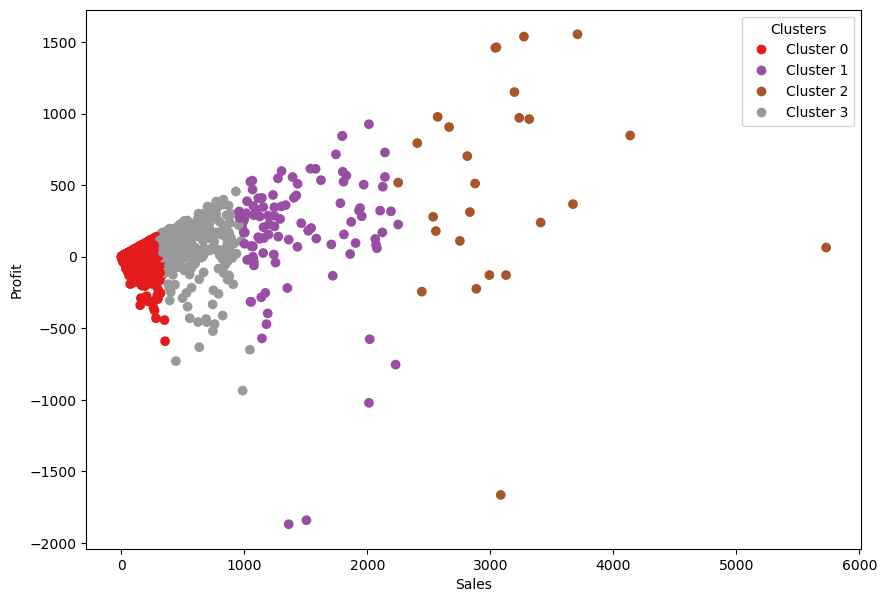

In [15]:
#------------visual plotting of the clusters formed  
kdata_sam['Cluster'] = cl

plt.figure(figsize=(10, 7))   
scatter = plt.scatter(kdata_sam['Sales'], kdata_sam['Profit'], c=kdata_sam['Cluster'], cmap='Set1')

plt.xlabel("Sales")
plt.ylabel("Profit")

# Create a legend using legend_elements
legend_handles, _ = scatter.legend_elements()
legend_labels = [f'Cluster {cluster}' for cluster in sorted(kdata_sam['Cluster'].unique())]
plt.legend(legend_handles, legend_labels, title='Clusters')

plt.show()


In [16]:
print("Hierarchical vs KMeans")

print("Hierarhical Clustering with n_clusters = 3:")
print(f"Silhouette score: {silhouette_score(hdata_sam,cl_3)}")
print(f"Size of 1st cluster = {hdata_sam2[hdata_sam2['Cluster'] == 0].shape[0]}")
print(f"Size of 2nd cluster = {hdata_sam2[hdata_sam2['Cluster'] == 1].shape[0]}")
print(f"Size of 3rd cluster = {hdata_sam2[hdata_sam2['Cluster'] == 2].shape[0]}")

print("Hierarchical Clustering with n_clusters = 4:")
print(f"Silhouette score: {silhouette_score(hdata_sam2,cl_4)}")
print(f"Size of 1st cluster = {hdata_sam[hdata_sam['Cluster'] == 0].shape[0]}")
print(f"Size of 2nd cluster = {hdata_sam[hdata_sam['Cluster'] == 1].shape[0]}")
print(f"Size of 3rd cluster = {hdata_sam[hdata_sam['Cluster'] == 2].shape[0]}")
print(f"Size of 4th cluster = {hdata_sam[hdata_sam['Cluster'] == 3].shape[0]}")

print("KMeans Clustering with n_clusters = 4:")
print(f"Silhouette score: {silhouette_score(kdata_sam,cl)}")
print(f"Size of 1st cluster = {kdata_sam[kdata_sam['Cluster'] == 0].shape[0]}")
print(f"Size of 2nd cluster = {kdata_sam[kdata_sam['Cluster'] == 1].shape[0]}")
print(f"Size of 3rd cluster = {kdata_sam[kdata_sam['Cluster'] == 2].shape[0]}")
print(f"Size of 4th cluster = {kdata_sam[kdata_sam['Cluster'] == 3].shape[0]}")


Hierarchical vs KMeans
Hierarhical Clustering with n_clusters = 3:
Silhouette score: 0.7385668937952183
Size of 1st cluster = 59
Size of 2nd cluster = 2201
Size of 3rd cluster = 304
Hierarchical Clustering with n_clusters = 4:
Silhouette score: 0.7378556042598812
Size of 1st cluster = 2201
Size of 2nd cluster = 43
Size of 3rd cluster = 304
Size of 4th cluster = 16
KMeans Clustering with n_clusters = 4:
Silhouette score: 0.6860083693877456
Size of 1st cluster = 2041
Size of 2nd cluster = 106
Size of 3rd cluster = 26
Size of 4th cluster = 391


In [17]:
#----------------------------EDA on Clusters formed via KMeans------------------------
 